In [ ]:
# download R library packages 

In [1]:
library(curl)

library(c(rgdal,rts,rasterVis))

library(rts)

library(rasterVis)

library(RColorBrewer)

library(lattice)

library(proj4)

library(exactextractr)

library(rgdal)

require(rgeos)

require(sf)


Loading required package: sp
rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /home/kkyong77/anaconda3/envs/r_env/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.1.1, September 1st, 2020, [PJ_VERSION: 711]
Path to PROJ shared files: /home/kkyong77/anaconda3/envs/r_env/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.


ERROR: Error in library(rts): there is no package called ‘rts’


In [2]:
# define the directory and file name for downloading modis data
dataPath <- "/scratch/data/modis"
downloadList <-"/scratch/data/modis/CR-LAI-2019-2020-granule-list.txt"


Loading required package: lattice
Loading required package: latticeExtra
Loading required package: RColorBrewer


In [4]:
## scanning the lists of files
filesl <- scan(downloadList, what='list', sep='\n')

## downloading modis files 

for (d in 1:length(filesl)){

 curl_download(url=filesl[d], destfile=paste0(dataPath,"/",basename(filesl[d])),quiet = T, handle =new_handle())

  Sys.sleep(1)

    #  print(paste0('Downloading source data (Step 1 of 6): ',round(d /length(filesl) * 100, digits=2),'%'))
   print(d)
}



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [ ]:
# display the downloaded files

In [6]:
getwd()
dataPath

[1] "/scratch/Foss2020Team6project/modis"

[1] "/scratch/data/modis"

In [7]:
# reading files
## clip data----
setwd(dataPath)


In [8]:
# reading files----------------

list.files()


[1] "CR-LAI-2019-2020-granule-list.txt"                  
  [2] "MCD15A3H.006_Fpar_500m_doy2019273_aid0001.tif"      
  [3] "MCD15A3H.006_Fpar_500m_doy2019277_aid0001.tif"      
  [4] "MCD15A3H.006_Fpar_500m_doy2019281_aid0001.tif"      
  [5] "MCD15A3H.006_Fpar_500m_doy2019285_aid0001.tif"      
  [6] "MCD15A3H.006_Fpar_500m_doy2019289_aid0001.tif"      
  [7] "MCD15A3H.006_Fpar_500m_doy2019293_aid0001.tif"      
  [8] "MCD15A3H.006_Fpar_500m_doy2019297_aid0001.tif"      
  [9] "MCD15A3H.006_Fpar_500m_doy2019301_aid0001.tif"      
 [10] "MCD15A3H.006_Fpar_500m_doy2019305_aid0001.tif"      
 [11] "MCD15A3H.006_Fpar_500m_doy2019309_aid0001.tif"      
 [12] "MCD15A3H.006_Fpar_500m_doy2019313_aid0001.tif"      
 [13] "MCD15A3H.006_Fpar_500m_doy2019317_aid0001.tif"      
 [14] "MCD15A3H.006_Fpar_500m_doy2019321_aid0001.tif"      
 [15] "MCD15A3H.006_Fpar_500m_doy2019325_aid0001.tif"      
 [16] "MCD15A3H.006_Fpar_500m_doy2019329_aid0001.tif"      
 [17] "MCD15A3H.006_Fpar_500m_doy2019333_aid0001.tif"      
 [18] "MCD15A3H.006_Fpar_500m_doy2019337_aid0001.tif"      
 [19] "MCD15A3H.006_Fpar_500m_doy2019341_aid0001.tif"      
 [20] "MCD15A3H.006_Fpar_500m_doy2019345_aid0001.tif"      
 [21] "MCD15A3H.006_Fpar_500m_doy2019349_aid0001.tif"      
 [22] "MCD15A3H.006_Fpar_500m_doy2019353_aid0001.tif"      
 [23] "MCD15A3H.006_Fpar_500m_doy2019357_aid0001.tif"      
 [24] "MCD15A3H.006_Fpar_500m_doy2019361_aid0001.tif"      
 [25] "MCD15A3H.006_Fpar_500m_doy2019365_aid0001.tif"      
 [26] "MCD15A3H.006_Fpar_500m_doy2020001_aid0001.tif"      
 [27] "MCD15A3H.006_Fpar_500m_doy2020005_aid0001.tif"      
 [28] "MCD15A3H.006_Fpar_500m_doy2020009_aid0001.tif"      
 [29] "MCD15A3H.006_Fpar_500m_doy2020013_aid0001.tif"      
 [30] "MCD15A3H.006_Fpar_500m_doy2020017_aid0001.tif"      
 [31] "MCD15A3H.006_Fpar_500m_doy2020021_aid0001.tif"      
 [32] "MCD15A3H.006_Fpar_500m_doy2020025_aid0001.tif"      
 [33] "MCD15A3H.006_Fpar_500m_doy2020029_aid0001.tif"      
 [34] "MCD15A3H.006_Fpar_500m_doy2020033_aid0001.tif"      
 [35] "MCD15A3H.006_Fpar_500m_doy2020037_aid0001.tif"      
 [36] "MCD15A3H.006_Fpar_500m_doy2020041_aid0001.tif"      
 [37] "MCD15A3H.006_Fpar_500m_doy2020045_aid0001.tif"      
 [38] "MCD15A3H.006_Fpar_500m_doy2020049_aid0001.tif"      
 [39] "MCD15A3H.006_Fpar_500m_doy2020053_aid0001.tif"      
 [40] "MCD15A3H.006_Fpar_500m_doy2020057_aid0001.tif"      
 [41] "MCD15A3H.006_Fpar_500m_doy2020061_aid0001.tif"      
 [42] "MCD15A3H.006_Fpar_500m_doy2020065_aid0001.tif"      
 [43] "MCD15A3H.006_Fpar_500m_doy2020069_aid0001.tif"      
 [44] "MCD15A3H.006_Fpar_500m_doy2020073_aid0001.tif"      
 [45] "MCD15A3H.006_Fpar_500m_doy2020077_aid0001.tif"      
 [46] "MCD15A3H.006_Fpar_500m_doy2020081_aid0001.tif"      
 [47] "MCD15A3H.006_Fpar_500m_doy2020085_aid0001.tif"      
 [48] "MCD15A3H.006_Fpar_500m_doy2020089_aid0001.tif"      
 [49] "MCD15A3H.006_Fpar_500m_doy2020093_aid0001.tif"      
 [50] "MCD15A3H.006_Fpar_500m_doy2020097_aid0001.tif"      
 [51] "MCD15A3H.006_Fpar_500m_doy2020101_aid0001.tif"      
 [52] "MCD15A3H.006_Fpar_500m_doy2020105_aid0001.tif"      
 [53] "MCD15A3H.006_Fpar_500m_doy2020109_aid0001.tif"      
 [54] "MCD15A3H.006_Fpar_500m_doy2020113_aid0001.tif"      
 [55] "MCD15A3H.006_Fpar_500m_doy2020117_aid0001.tif"      
 [56] "MCD15A3H.006_Fpar_500m_doy2020121_aid0001.tif"      
 [57] "MCD15A3H.006_Fpar_500m_doy2020125_aid0001.tif"      
 [58] "MCD15A3H.006_Fpar_500m_doy2020129_aid0001.tif"      
 [59] "MCD15A3H.006_Fpar_500m_doy2020133_aid0001.tif"      
 [60] "MCD15A3H.006_Fpar_500m_doy2020137_aid0001.tif"      
 [61] "MCD15A3H.006_Fpar_500m_doy2020141_aid0001.tif"      
 [62] "MCD15A3H.006_Fpar_500m_doy2020145_aid0001.tif"      
 [63] "MCD15A3H.006_Fpar_500m_doy2020149_aid0001.tif"      
 [64] "MCD15A3H.006_Fpar_500m_doy2020153_aid0001.tif"      
 [65] "MCD15A3H.006_Fpar_500m_doy2020157_aid0001.tif"      
 [66] "MCD15A3H.006_Fpar_500m_doy2020161_aid0001.tif"      
 [67] "MCD15A3H.006_Fpar_500m_doy2020165_a

In [9]:
## reading  LAI files
LAI_list<-list.files(pattern=glob2rx("*Lai_500m*"))

# reading LAI_sd files
LAIsd_list<-list.files(pattern=glob2rx("*LaiStdDev_500m*"))

# reading LAI QC files
LAIQC_list<-list.files(pattern=glob2rx("*FparLai_QC*"))


In [10]:
LAI_list[1]

[1] "MCD15A3H.006_Lai_500m_doy2019273_aid0001.tif"

In [16]:
# plotting lAI files
library(raster)
library(rasterVis)

plot(raster(LAI_list[1]))

Warning message in .newCRS(value):
“+proj=longlat +datum=WGS84 +no_defs is not a valid PROJ.4 CRS string”

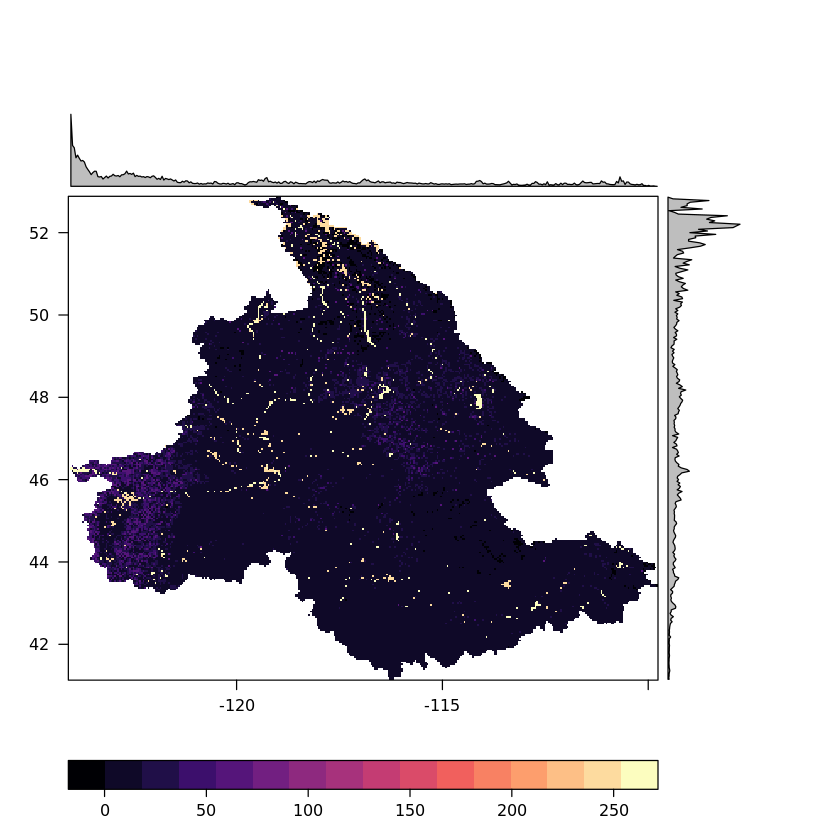

In [19]:

levelplot(raster(LAI_list[1]))

In [20]:
## cropping the the LAI data by the watershed boundary
# reading boundary of priest watershed-------------------
datapath_shape<-"/scratch/data/shapefiles"
yakima_shafile<-readOGR(datapath_shape,layer="Yakima84")

OGR data source with driver: ESRI Shapefile 
Source: "/scratch/data/shapefiles", layer: "Yakima84"
with 1 features
It has 5 fields
Integer64 fields read as strings:  OBJECTID disID 


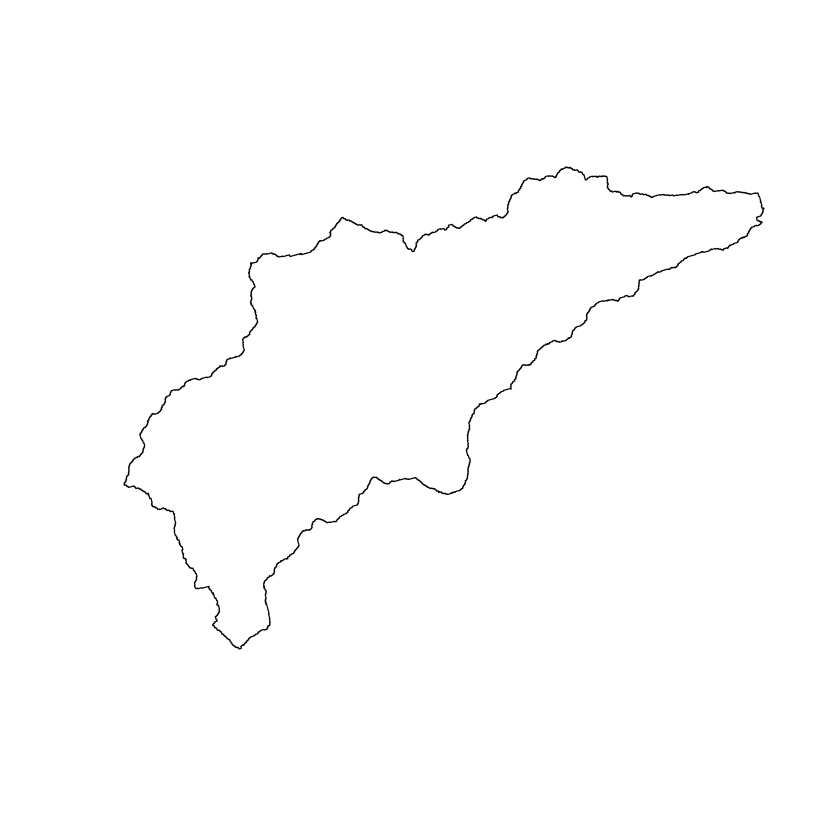

In [21]:
# plotting shapefiles

plot(yakima_shafile)

In [3]:
# loading sf library
library(sf)

ERROR: Error: package or namespace load failed for ‘sf’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/kkyong77/anaconda3/envs/r_env/lib/R/library/KernSmooth/libs/KernSmooth.so':
  libRblas.so: cannot open shared object file: No such file or directory


In [3]:
# loading sf library
library(sf)

ERROR: Error: package or namespace load failed for ‘sf’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/kkyong77/anaconda3/envs/r_env/lib/R/library/KernSmooth/libs/KernSmooth.so':
  libRblas.so: cannot open shared object file: No such file or directory
